In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
stock = yf.download("ICICIBANK.NS", start="2010-01-01", end="2020-12-31")
stock

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,159.454544,160.909088,159.090912,159.945450,134.801117,9162186
2010-01-05,161.454544,163.590912,160.272720,161.463638,136.080673,14659997
2010-01-06,162.727264,164.972733,161.836365,162.699997,137.122635,20410054
2010-01-07,163.045456,163.045456,159.363632,161.163635,135.827805,10852286
2010-01-08,161.654541,161.818176,158.363632,158.899994,133.919983,20580934
...,...,...,...,...,...,...
2020-12-23,499.000000,505.500000,496.549988,503.600006,495.059479,19205951
2020-12-24,506.750000,515.950012,505.100006,513.549988,504.840698,17576807
2020-12-28,515.900024,521.200012,513.599976,520.099976,511.279602,14470472


In [3]:
daily_price = (stock.loc[:, "Open"] + stock.loc[:, "Close"])/2
stock['daily_price'] = daily_price
stock

,Open,High,Low,Close,Adj Close,Volume,daily_price
Date,,,,,,,
2010-01-04,159.454544,160.909088,159.090912,159.945450,134.801117,9162186,159.699997
2010-01-05,161.454544,163.590912,160.272720,161.463638,136.080673,14659997,161.459091
2010-01-06,162.727264,164.972733,161.836365,162.699997,137.122635,20410054,162.713631
2010-01-07,163.045456,163.045456,159.363632,161.163635,135.827805,10852286,162.104546
2010-01-08,161.654541,161.818176,158.363632,158.899994,133.919983,20580934,160.277267
...,...,...,...,...,...,...,...
2020-12-23,499.000000,505.500000,496.549988,503.600006,495.059479,19205951,501.300003
2020-12-24,506.750000,515.950012,505.100006,513.549988,504.840698,17576807,510.149994
2020-12-28,515.900024,521.200012,513.599976,520.099976,511.279602,14470472,518.000000


In [4]:
stock['100-SMA'] = stock['Close'].rolling(window=100).mean()
stock['200-SMA'] = stock['Close'].rolling(window=200).mean()
stock['150-SMA'] = stock['Close'].rolling(window=150).mean()
stock.dropna()

,Open,High,Low,Close,Adj Close,Volume,daily_price,100-SMA,200-SMA,150-SMA
Date,,,,,,,,,,
2010-10-19,204.545456,209.890915,202.454544,203.554550,174.088211,21956495,204.050003,177.037089,169.502226,173.874180
2010-10-20,202.545456,205.100006,201.409088,202.527267,173.209641,12450344,202.536362,177.538816,169.715135,174.056302
2010-10-21,203.818176,205.790909,200.563629,205.381821,175.650986,20931966,204.599998,178.061180,169.934726,174.266059
2010-10-22,206.363632,207.090912,203.109085,205.790909,176.000854,11809754,206.077271,178.566180,170.150180,174.504362
2010-10-25,206.909088,210.527267,206.363632,207.654541,177.594711,13466711,207.281815,179.068453,170.382635,174.766908
...,...,...,...,...,...,...,...,...,...,...
2020-12-23,499.000000,505.500000,496.549988,503.600006,495.059479,19205951,501.300003,418.346002,383.646001,396.546668
2020-12-24,506.750000,515.950012,505.100006,513.549988,504.840698,17576807,510.149994,419.971501,383.782001,398.019001
2020-12-28,515.900024,521.200012,513.599976,520.099976,511.279602,14470472,518.000000,421.650501,384.093751,399.360668


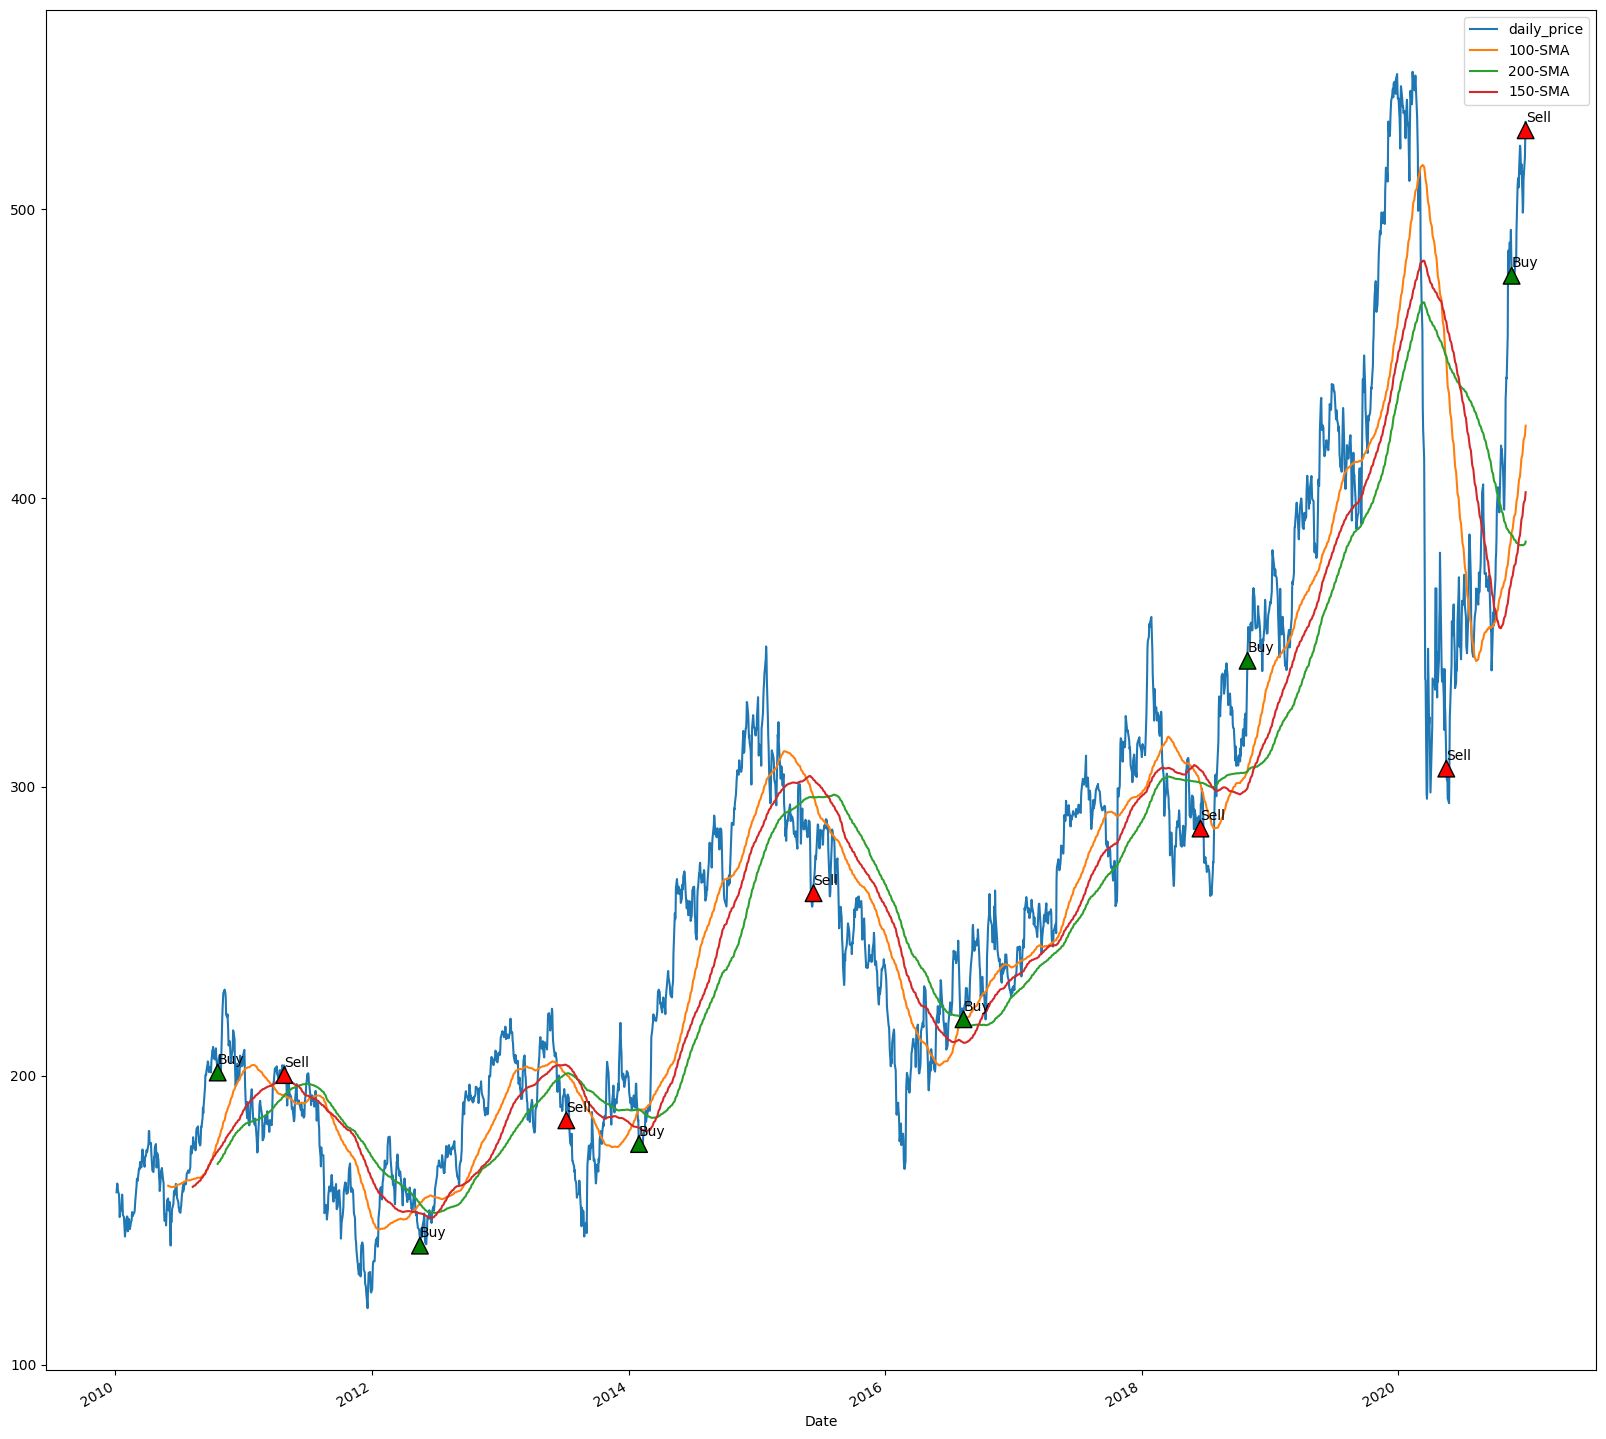

In [15]:
stock.plot(y=["daily_price", "100-SMA", "200-SMA", "150-SMA"],
           kind="line", figsize=(20, 20))



trade = False
p_sum = 100000
portfolio_value = []
portfolio_value.append(p_sum)


for i in range(len(stock)):

    if (trade == False):

        if (stock.iloc[i, 7] >= stock.iloc[i, 8]):

            trade = True

            plt.annotate(text="Buy", arrowprops=dict(
                facecolor='green', shrink=0.01), xy=(stock.index[i], stock.iloc[i, 6]))

            shares = (int)(p_sum/stock.iloc[i, 3])

    if (trade == True):

        if (stock.iloc[i, 7] < stock.iloc[i, 8] or (i == (len(stock)-1))):

            trade = False

            plt.annotate(text="Sell", arrowprops=dict(
                facecolor='red', shrink=0.01), xy=(stock.index[i], stock.iloc[i, 6]))

            p_sum = stock.iloc[i, 3]*shares
            portfolio_value.append(p_sum)

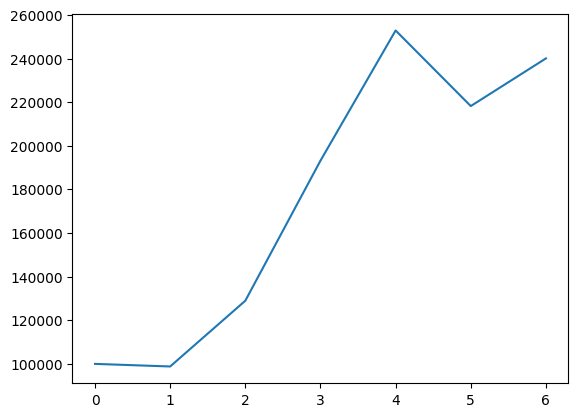

In [16]:
# Portfolio Value over the number of trades
plt.plot(portfolio_value)

In [6]:
# Note to self:
# First version of this file was a test case for python syntax, next approach to means will be using relative divergences and deviation threshold to generate trade signals.
# Also accounting for volatility, risk adjusted returns and comparison matrix for testing cases (comparison matrix for MA divergence will not be helpful as it'll biased to a single stock and its historical divergences)